In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
# Read CSV file of collected tweets with designated column names

col_list = ['created_at','timestamp_ms','text','lang','followers','friends']
data = pd.read_csv("tweets_to_be_cleaned.csv",usecols=col_list)

In [5]:
# Display sample of data (Note all raw data will be hidden for Twitter user privacy reasons)

pd.set_option('display.min_rows',20)
# data

In [6]:
# Preprocessing: Convert timestamp to seconds (Need)

# data = pd.read_pickle('tweetByUser.pkl')

# def converter(k):
#     # Default time is 0 seconds
#     t = 0
#     num = 1
    
#     # Multiply ans by 3600s if time is hours
#     if k == 0:
#         num = 3600
        
#     # Multiply ans by 60s if time is min
#     elif k == 1:
#         num = 60
    
#     # Avoid leading 0 when converting to int
#     if int(list(time[k])[0]) == 0:
#         if int(list(time[k])[1]) == 0:
#             pass
#         else:
#             t = int(list(time[k])[1]) * num
#     else:
#         t = int(time[k]) * num
#     return t

# firstTime = 0
# for i, row in data.iterrows():
    
#     # Split timestamp into hours, min, seconds
#     dateList = row['created_at'].split(' ')
#     time = dateList[3].split(':')
    
#     # Add hours, min, seconds converted to seconds
#     s = converter(0) + converter(1) + converter(2)
    
#     # Store first timestamp as time 0 seconds
#     if i == 0:
#         firstTime = s
    
#     # Replace data with seconds from first timestamp
#     data.loc[i,'created_at'] = s - firstTime
    
# data

AttributeError: 'int' object has no attribute 'split'

In [5]:
# Preprocess: Remove Twitter reserved words, lowercase words, and remove punctuation

import re
import string
import preprocessor as p
p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.RESERVED, p.OPT.NUMBER, p.OPT.EMOJI, p.OPT.SMILEY)

def clean_text_round1(text):
    text = p.clean(text)
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [6]:
# Look at data cleaned after Round 1

data['text'] = data['text'].apply(round1)
# data.drop(columns=['timestamp_ms','followers','friends', 'lang'])

,created_at,text
0,0,brt the us intelligence agencys report on the...
1,0,brt and they wonder why we donu2019t trust mu...
2,0,brt nenhum caso de covid19 foi registrado nas...
3,0,brt an upstate new york hospital said it will...
4,0,brt i dont even understand why hospital syste...
...,...,...
87376,16188,brt heartbreakingu20145 kids are now orphaned...
87377,16188,brt covid19 boosters are coming but who will ...
87378,16188,brt u0e2au0e16u0e32u0e19u0e01u0e32u0e23u0e13u...
87379,16188,brt as covid19 cases in the uk have continued...


In [3]:
# Save this data as tweet by user for sentiment analysis

data.to_pickle("tweetByUser.pkl")

Text(0.5, 1.0, 'Most Discussed Topics (2021)')

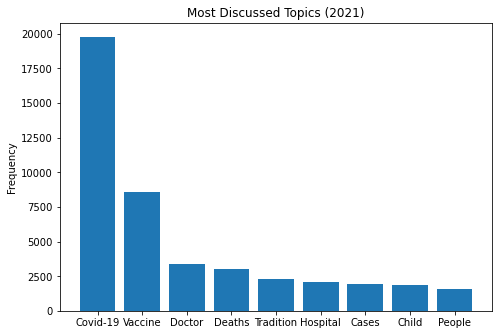

In [4]:
# Preprocess: Remove previously missed numbers, punctuation, and stopwords. Lemmatize words. 
#             Remove meaningless words as they appear

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


data = pd.read_pickle('tweetByUser.pkl') 

tokenList = list(word_tokenize(data['text'].to_string()))
stopwords_en = set(stopwords.words('english')).union({'...', 'brt', 'b', 'de', 'que', 'la', \
                                                      'u0e2du0e31u0e19u0e19u0e35u0e49u0e19u0e48u0', \
                                                      'new','even','el', 'u', 'p', 'dont', 'en', 'c', 'among', 'f', 'e', \
                                                      'u0001f6a8loxdaltimo', 'th', 'le', 'untuk', 'li', 'dan', 'see', 'today', \
                                                      'meet', 'breaking', 'video'})
wordList = [word for word in tokenList if word not in stopwords_en]

wnl = WordNetLemmatizer()
porter = PorterStemmer()

wordFreqList = dict()
for word in wordList:
    try:
        if int(word):
            continue
    except:
        temp = wnl.lemmatize(porter.stem(word))
        if wordFreqList.get(temp):
            wordFreqList[temp] = wordFreqList.get(temp) + 1
        else:
            wordFreqList[temp] = 1

wordFreqList['covid19'] = wordFreqList['covid19'] + wordFreqList.pop('pandem') + wordFreqList.pop('covi') \
                          + wordFreqList.pop('coronaviru') + wordFreqList.pop('covid') + wordFreqList.pop('covid1') \
                          + wordFreqList.pop('bcovid19') + wordFreqList.pop('cov') + wordFreqList.pop('pandemia') \
                          + wordFreqList.pop('coronavir') + wordFreqList.pop('pand') + wordFreqList.pop('pandemi') \
                          + wordFreqList.pop('bvaksinasi') + wordFreqList.pop('bcoronaviru')
wordFreqList['vaccine'] = wordFreqList.pop('vaccin') + wordFreqList.pop('shot') + wordFreqList.pop('vaccina') \
                          + wordFreqList.pop('vacc') + wordFreqList.pop('vacci') + wordFreqList.pop('vax') \
                          + wordFreqList.pop('vac') + wordFreqList.pop('vaksin') + wordFreqList.pop('vacuna') \
                          + wordFreqList.pop('vaccinat') + wordFreqList.pop('vacunars') + wordFreqList.pop('vaksina') \
                          + wordFreqList.pop('vaksinasi')
wordFreqList['doctor'] = wordFreqList['doctor'] + wordFreqList.pop('dr')
wordFreqList['child'] = wordFreqList['child'] + wordFreqList.pop('kid')
wordFreqList['death'] = wordFreqList['death'] + wordFreqList.pop('die') + wordFreqList.pop('muert')
wordFreqList['mandate'] = wordFreqList.pop('mandat') + wordFreqList.pop('manda')
wordFreqList['traditional'] = wordFreqList.pop('traditi')
wordFreqList['hospital'] = wordFreqList.pop('hospit')
wordFreqList['people'] = wordFreqList.pop('peopl') + wordFreqList.pop('persona')
wordFreqList['biden'] = wordFreqList['biden'] + wordFreqList.pop('bidenu2019')
wordFreqList['test'] = wordFreqList['test'] + wordFreqList.pop('prueba')

finalTokenized = dict()
for key, value in wordFreqList.items():
    if value > 50:
        finalTokenized[key] = value

pd.set_option('display.min_rows',20)
tokenizedWords = pd.DataFrame.from_dict(finalTokenized, orient='index')
tokenizedWords.sort_values(by=0, ascending=False)

# Plot most frequent words count
xlabel = ['Covid-19', 'Vaccine', 'Doctor', 'Deaths', 'Tradition', 'Hospital', 'Cases', 'Child', 'People']
ylabel = [wordFreqList.get('covid19'), wordFreqList.get('vaccine'), wordFreqList.get('doctor'), \
          wordFreqList.get('death'), wordFreqList.get('traditional'), wordFreqList.get('hospital'), \
          wordFreqList.get('case'), wordFreqList.get('child'), wordFreqList.get('people')]

%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(xlabel,ylabel)
ax.set_ylabel('Frequency')
ax.set_title('Most Discussed Topics (2021)')

In [25]:
# Save counts of tokenized data

tokenizedWords.to_pickle("wordCounts.pkl")

Text(0.5, 1.0, 'Sentiments on Vaccination')

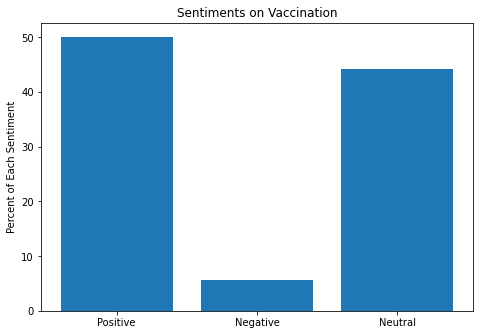

In [43]:
# Preprocess: Sentiment Analysis of those talking about vaccines

from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

porter = PorterStemmer()
wnl = WordNetLemmatizer()

data = pd.read_pickle('tweetByUser.pkl') 

positive = []
negative = []
neutral = []
for i, row in data.iterrows():
    wordSet = set()
    words = str(row['text']).split(' ')
    
    for word in words:
        wordSet.add(wnl.lemmatize(porter.stem(word)))
    
    if ('vaccin' in wordSet) or ('shot' in wordSet) or ('vaccina' in wordSet) or ('vacc' in wordSet) or ('vacci' in wordSet) \
        or ('vax' in wordSet) or ('vac' in wordSet) or ('vaccinat' in wordSet):
        b = TextBlob(str(row['text']))
        if b.sentiment[0] > 0:
            positive.append(b.sentiment[0])
        elif b.sentiment[0] < 0:
            negative.append(b.sentiment[0])
        else:
            neutral.append(b.sentiment[0])

sumSentiment = len(positive) + len(negative) + len(neutral) 
xlabel = ['Positive', 'Negative', 'Neutral']
ylabel = [len(positive)/sumSentiment * 100, len(negative)/sumSentiment * 100, len(neutral)/sumSentiment * 100]

%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(xlabel,ylabel)
ax.set_ylabel('Percent of Each Sentiment')
ax.set_title('Sentiments on Vaccination')


Text(0.5, 1.0, 'Average Sentiment of Tweets about Vaccines over Five Hours')

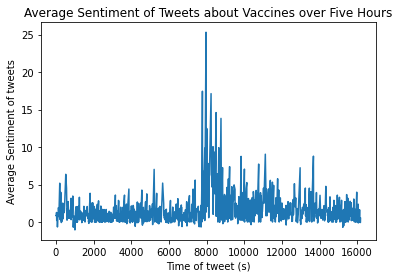

In [9]:
# Cumulative Sentiment Analysis Graph for Vaccines

from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

porter = PorterStemmer()
wnl = WordNetLemmatizer()

data = pd.read_pickle('tweetByUser.pkl')

sentimentSum = 0
sentiments = []
sentimentAverage = []
sentimentTime = []
for i, row in data.iterrows():
    wordSet = set()
    words = str(row['text']).split(' ')
    
    for j, word in enumerate(words):
        wordSet.add(wnl.lemmatize(porter.stem(word)))
    
    if ('vaccin' in wordSet) or ('shot' in wordSet) or ('vaccina' in wordSet) or ('vacc' in wordSet) or ('vacci' in wordSet) \
        or ('vax' in wordSet) or ('vac' in wordSet) or ('vaccinat' in wordSet):
        b = TextBlob(str(row['text']))
        sentimentSum += b.sentiment[0]
        sentiments.append(sentimentSum)
        if j % 20 == 0:
            sentimentAverage.append(sentimentSum)
            sentimentSum = 0
            sentimentTime.append(row['created_at'])

%matplotlib inline
plt.plot(sentimentTime, sentimentAverage)
plt.xlabel('Time of tweet (s)')
plt.ylabel('Average Sentiment of tweets')
plt.title('Average Sentiment of Tweets about Vaccines over Five Hours')

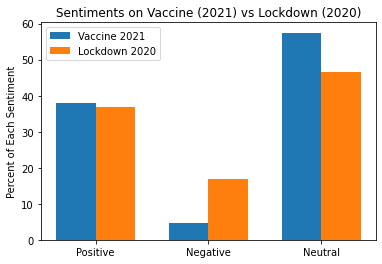

In [31]:
# Preprocess Step 5: Sentiment Analysis for Mandate and Lockdown/Quarantine

from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import numpy as np

porter = PorterStemmer()
wnl = WordNetLemmatizer()

data = pd.read_pickle('tweetByUser.pkl')
data2 = pd.read_pickle('tweetByUser2020.pkl')

positive = []
negative = []
neutral = []
for i, row in data.iterrows():
    wordSet = set()
    words = str(row['text']).split(' ')
    
    for word in words:
        wordSet.add(wnl.lemmatize(porter.stem(word)))
    
    if ('mandat' in wordSet) or ('manda' in wordSet):
        b = TextBlob(str(row['text']))
        if b.sentiment[0] > 0:
            positive.append(b.sentiment[0])
        elif b.sentiment[0] < 0:
            negative.append(b.sentiment[0])
        else:
            neutral.append(b.sentiment[0])

            
positive2 = []
negative2 = []
neutral2 = []
for i, row in data2.iterrows():
    wordSet = set()
    words = str(row['text']).split(' ')
    
    for word in words:
        wordSet.add(wnl.lemmatize(porter.stem(word)))
    
    if ('lockdown' in wordSet) or ('quarantin' in wordSet):
        b = TextBlob(str(row['text']))
        if b.sentiment[0] > 0:
            positive2.append(b.sentiment[0])
        elif b.sentiment[0] < 0:
            negative2.append(b.sentiment[0])
        else:
            neutral2.append(b.sentiment[0])

sumSentiment = len(positive) + len(negative) + len(neutral)
sumSentiment2 = len(positive2) + len(negative2) + len(neutral2)
xlabel = ['Positive', 'Negative', 'Neutral']
y1label = [len(positive)/sumSentiment * 100, len(negative)/sumSentiment * 100, len(neutral)/sumSentiment * 100]
y2label = [len(positive2)/sumSentiment2 * 100, len(negative2)/sumSentiment2 * 100, len(neutral2)/sumSentiment2 * 100]

%matplotlib inline
x = np.arange(len(xlabel))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y1label, width, label='Vaccine 2021')
rects2 = ax.bar(x + width/2, y2label, width, label='Lockdown 2020')
ax.set_xticks(x)
ax.set_xticklabels(xlabel)
ax.set_ylabel('Percent of Each Sentiment')
ax.set_title('Sentiments on Vaccine (2021) vs Lockdown (2020)')
ax.legend()

Text(0.5, 1.0, 'Sentiment of Tweets about Mandates over Five Hours')

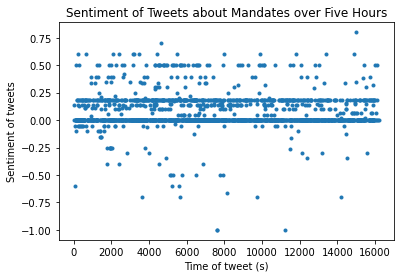

In [15]:
# Preprocessing Step 5: Sentiment Analysis for Mandate over time

from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

porter = PorterStemmer()
wnl = WordNetLemmatizer()

data = pd.read_pickle('tweetByUser.pkl') 

sentiments = []
sentimentTime = []
for i, row in data.iterrows():
    wordSet = set()
    words = str(row['text']).split(' ')
    
    for word in words:
        wordSet.add(wnl.lemmatize(porter.stem(word)))
    
    if ('mandat' in wordSet) or ('manda' in wordSet):
        b = TextBlob(str(row['text']))
        sentiments.append(b.sentiment[0])
        sentimentTime.append(row['created_at'])

%matplotlib inline
plt.scatter(sentimentTime, sentiments, marker='.')
plt.xlabel('Time of tweet (s)')
plt.ylabel('Sentiment of tweets')
plt.title('Sentiment of Tweets about Mandates over Five Hours')

Text(0.5, 1.0, 'Average Sentiment of Tweets about Biden over Five Hours')

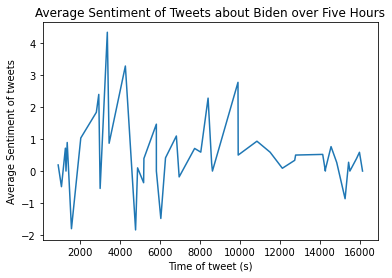

In [27]:
# Sentiment on Biden over Time

from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

porter = PorterStemmer()
wnl = WordNetLemmatizer()

data = pd.read_pickle('tweetByUser.pkl') 

sentimentSum = 0
sentiments = []
sentimentAverage = []
sentimentTime = []
for i, row in data.iterrows():
    wordSet = set()
    words = str(row['text']).split(' ')
    
    for j, word in enumerate(words):
        wordSet.add(wnl.lemmatize(porter.stem(word)))
    
    if ('biden' in wordSet) or ('bidenu2019' in wordSet):
        b = TextBlob(str(row['text']))
        sentimentSum += b.sentiment[0]
        sentiments.append(sentimentSum/(len(sentiments)+1))
        if j % 20 == 0:
            sentimentAverage.append(sentimentSum)
            sentimentSum = 0
            sentimentTime.append(row['created_at'])

%matplotlib inline
plt.plot(sentimentTime, sentimentAverage)
plt.xlabel('Time of tweet (s)')
plt.ylabel('Average Sentiment of tweets')
plt.title('Average Sentiment of Tweets about Biden over Five Hours')

Text(0.5, 1.0, 'Sentiments on Biden')

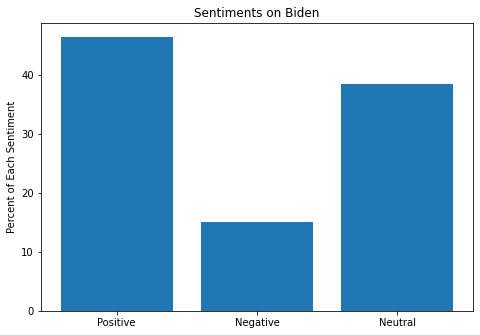

In [28]:
# Preprocess Step 5: Sentiment Analysis of those talking about Biden

from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

porter = PorterStemmer()
wnl = WordNetLemmatizer()

data = pd.read_pickle('tweetByUser.pkl') 

positive = []
negative = []
neutral = []
for i, row in data.iterrows():
    wordSet = set()
    words = str(row['text']).split(' ')
    
    for word in words:
        wordSet.add(wnl.lemmatize(porter.stem(word)))
    
    if ('biden' in wordSet) or ('bidenu2019' in wordSet):
        b = TextBlob(str(row['text']))
        if b.sentiment[0] > 0:
            positive.append(b.sentiment[0])
        elif b.sentiment[0] < 0:
            negative.append(b.sentiment[0])
        else:
            neutral.append(b.sentiment[0])

sumSentiment = len(positive) + len(negative) + len(neutral) 
xlabel = ['Positive', 'Negative', 'Neutral']
ylabel = [len(positive)/sumSentiment * 100, len(negative)/sumSentiment * 100, len(neutral)/sumSentiment * 100]

%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(xlabel,ylabel)
ax.set_ylabel('Percent of Each Sentiment')
ax.set_title('Sentiments on Biden')

Text(0.5, 1.0, "Frequency of Topics of 'Vaccine' and 'Lockdown' (2021)")

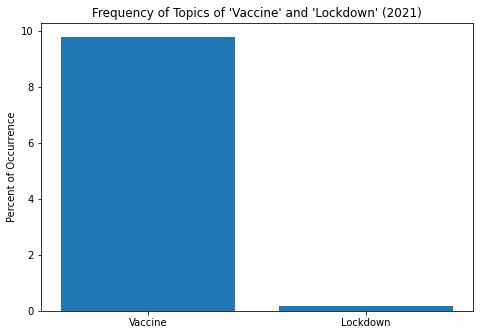

In [8]:
xlabel = ['Vaccine', 'Lockdown']
ylabel = [8565/87381 * 100 , 142/87381 * 100]

%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(xlabel,ylabel)
ax.set_ylabel('Percent of Occurrence')
ax.set_title("Frequency of Topics of 'Vaccine' and 'Lockdown' (2021)")

Text(0.5, 1.0, 'Frequency of Topics of Mandate in 2021 and Lockdown in 2020')

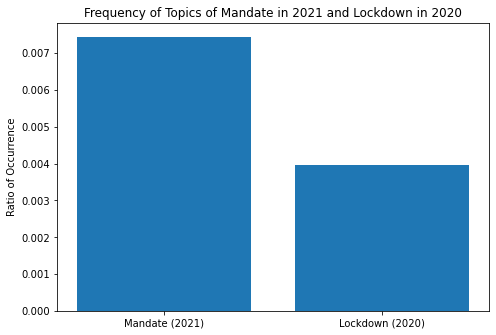

In [12]:
xlabel = ['Mandate (2021)', 'Lockdown (2020)']
ylabel = [651/87381, 366/92256]

%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(xlabel,ylabel)
ax.set_ylabel('Ratio of Occurrence')
ax.set_title("Frequency of Topics of Mandate in 2021 and Lockdown in 2020")

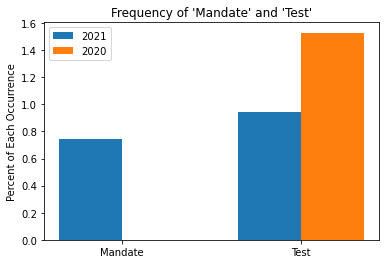

In [28]:
xlabel = ['Mandate', 'Test']
y1label = [wordFreqList.get('mandate')/87381 * 100, wordFreqList.get('test')/87381 *100] # 1411
y2label = [0 , 1411/92256 *100]

%matplotlib inline
x = np.arange(len(xlabel))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y1label, width, label='2021')
rects2 = ax.bar(x + width/2, y2label, width, label='2020')
ax.set_xticks(x)
ax.set_xticklabels(xlabel)
ax.set_ylabel('Percent of Each Occurrence')
ax.set_title("Frequency of 'Mandate' and 'Test'")
ax.legend()

Text(0.5, 1.0, 'Sentiments on Testing')

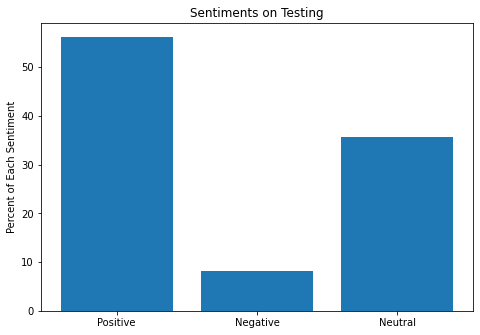

In [20]:
# Preprocess Step 5: Sentiment Analysis of those talking about Testing

from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

porter = PorterStemmer()
wnl = WordNetLemmatizer()

data = pd.read_pickle('tweetByUser.pkl') 

positive = []
negative = []
neutral = []
for i, row in data.iterrows():
    wordSet = set()
    words = str(row['text']).split(' ')
    
    for word in words:
        wordSet.add(wnl.lemmatize(porter.stem(word)))
    
    if ('test' in wordSet):
        b = TextBlob(str(row['text']))
        if b.sentiment[0] > 0:
            positive.append(b.sentiment[0])
        elif b.sentiment[0] < 0:
            negative.append(b.sentiment[0])
        else:
            neutral.append(b.sentiment[0])

sumSentiment = len(positive) + len(negative) + len(neutral) 
xlabel = ['Positive', 'Negative', 'Neutral']
ylabel = [len(positive)/sumSentiment * 100, len(negative)/sumSentiment * 100, len(neutral)/sumSentiment * 100]

%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(xlabel,ylabel)
ax.set_ylabel('Percent of Each Sentiment')
ax.set_title('Sentiments on Testing')